<a href="https://colab.research.google.com/github/piyushdhurwey-unique/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.42GB/s]


In [3]:
import zipfile
with zipfile.ZipFile('creditcardfraud.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')
    zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [6]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_card_data.shape

(284807, 31)

In [8]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# distribution of legit(0) and fraudulent(1) transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


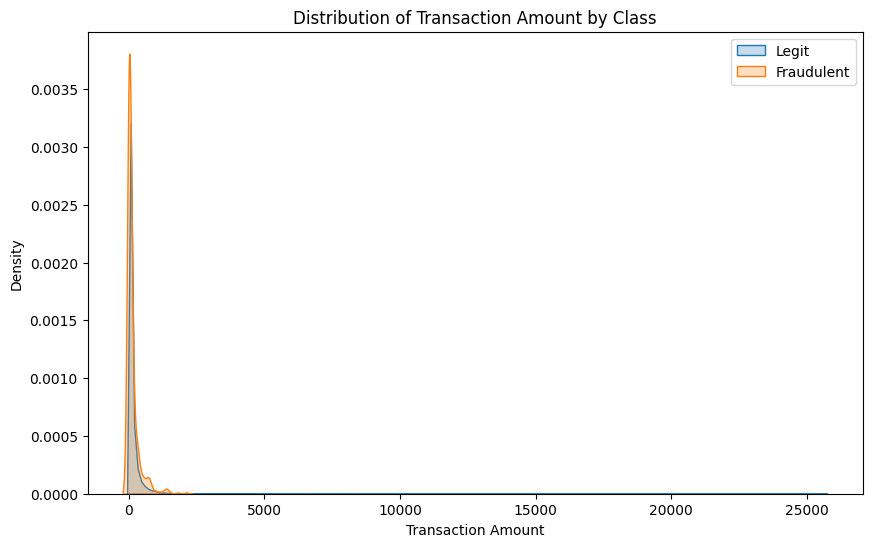

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and an axes object for the plot
plt.figure(figsize=(10, 6))

# Plot the distribution of 'Amount' for legitimate transactions
sns.kdeplot(credit_card_data[credit_card_data['Class'] == 0]['Amount'], label='Legit', fill=True)

# Plot the distribution of 'Amount' for fraudulent transactions
sns.kdeplot(credit_card_data[credit_card_data['Class'] == 1]['Amount'], label='Fraudulent', fill=True)

# Add title and labels
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Display the plot
plt.show()

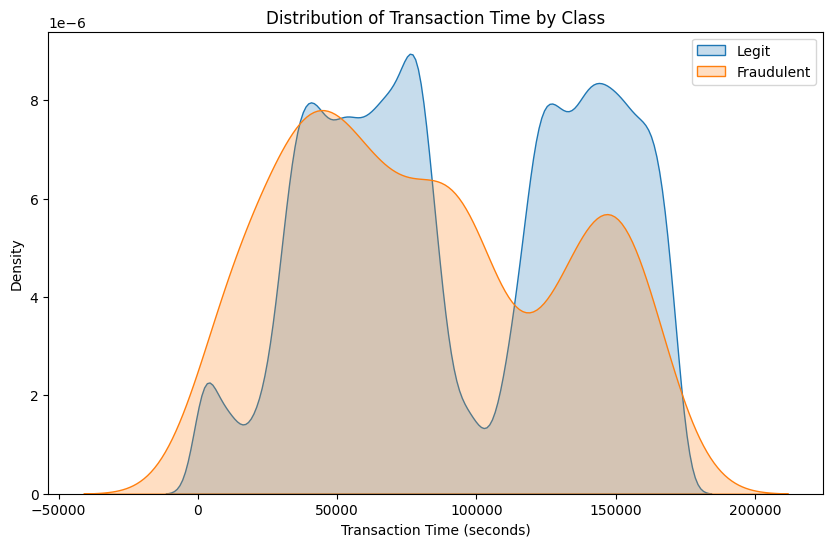

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and an axes object for the plot
plt.figure(figsize=(10, 6))

# Plot the distribution of 'Time' for legitimate transactions
sns.kdeplot(credit_card_data[credit_card_data['Class'] == 0]['Time'], label='Legit', fill=True)

# Plot the distribution of 'Time' for fraudulent transactions
sns.kdeplot(credit_card_data[credit_card_data['Class'] == 1]['Time'], label='Fraudulent', fill=True)

# Add title and labels
plt.title('Distribution of Transaction Time by Class')
plt.xlabel('Transaction Time (seconds)')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Display the plot
plt.show()

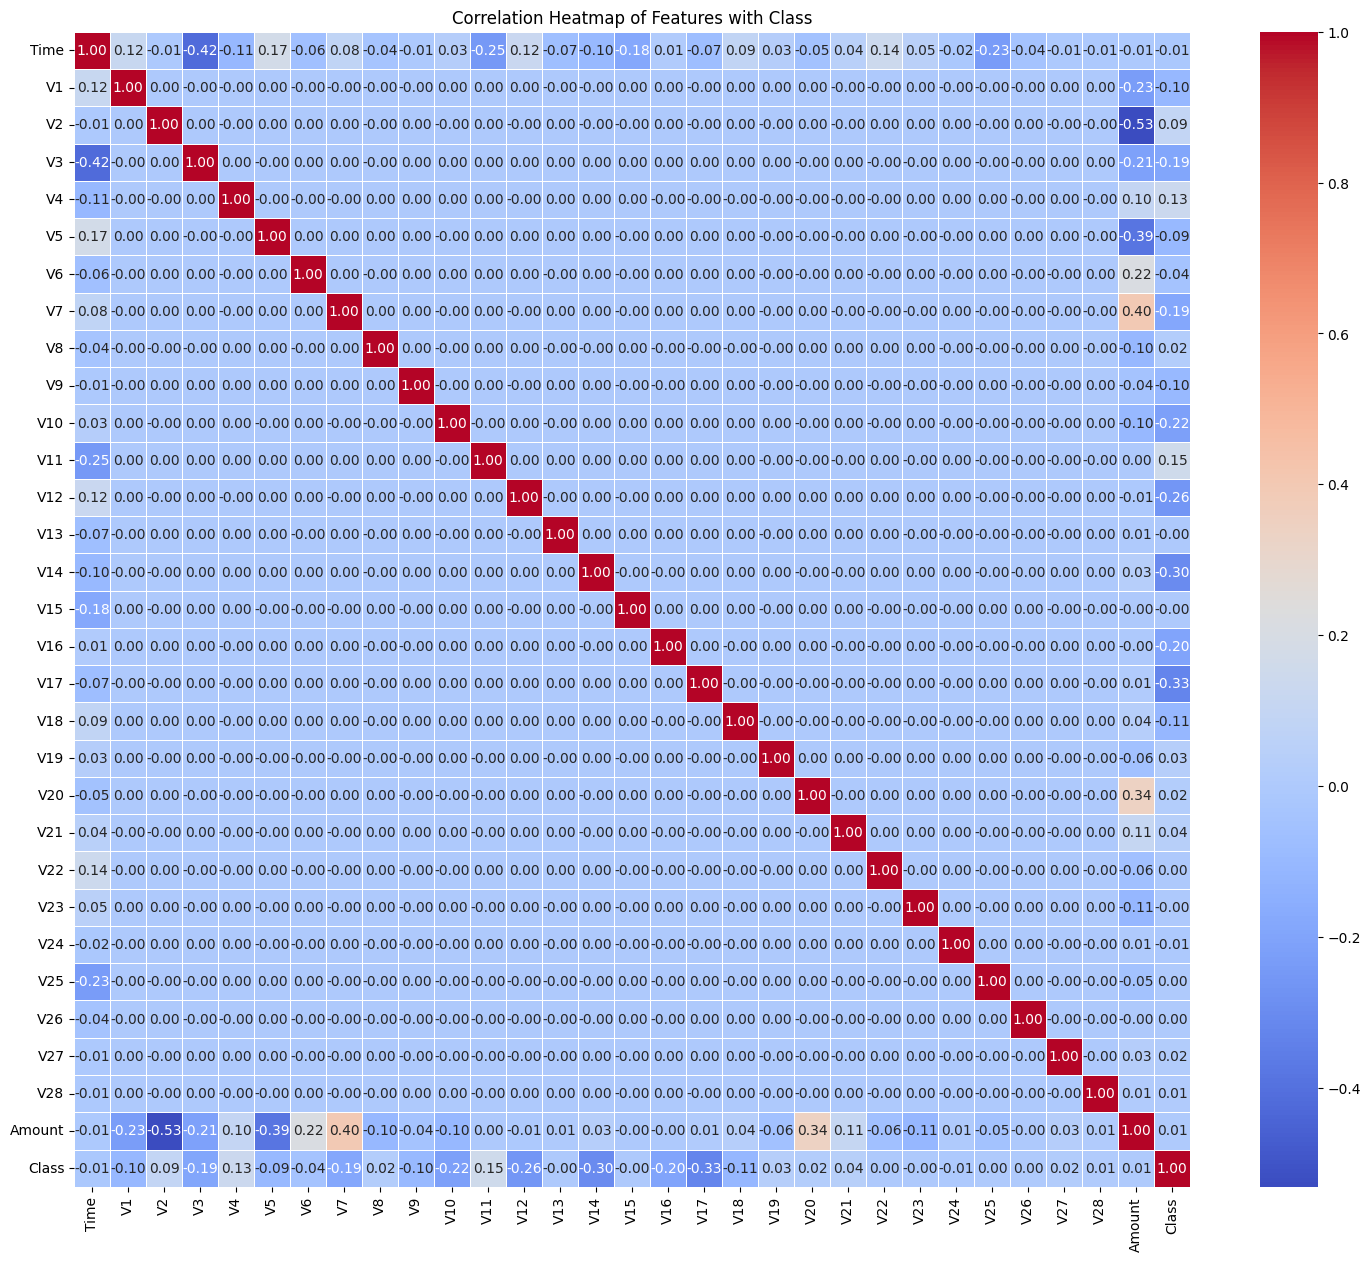

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = credit_card_data.corr()

# Set the figure size
plt.figure(figsize=(18, 15))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Features with Class')
plt.show()

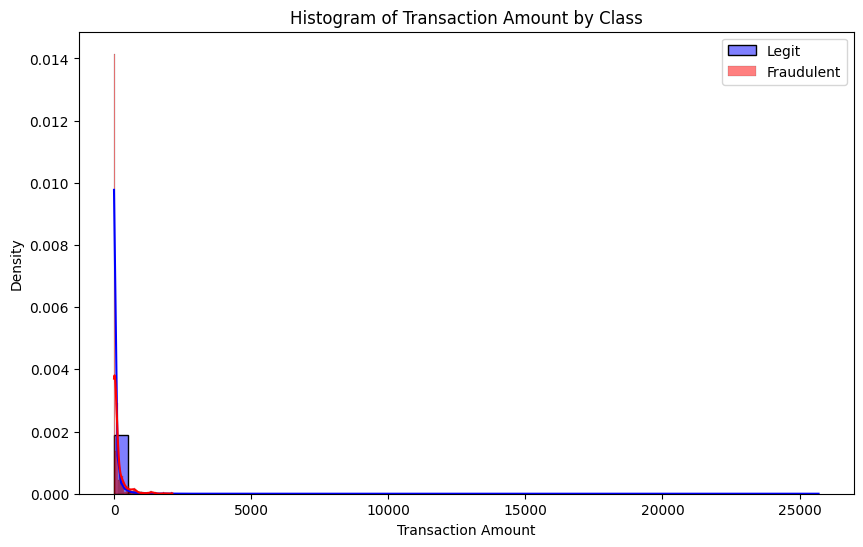

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and an axes object for the plot
plt.figure(figsize=(10, 6))

# Plot the histogram of 'Amount' for legitimate transactions
sns.histplot(credit_card_data[credit_card_data['Class'] == 0]['Amount'], bins=50, color='blue', label='Legit', kde=True, stat='density', alpha=0.5)

# Plot the histogram of 'Amount' for fraudulent transactions
sns.histplot(credit_card_data[credit_card_data['Class'] == 1]['Amount'], bins=50, color='red', label='Fraudulent', kde=True, stat='density', alpha=0.5)

# Add title and labels
plt.title('Histogram of Transaction Amount by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Display the plot
plt.show()

/tmp/ipython-input-1107714915.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


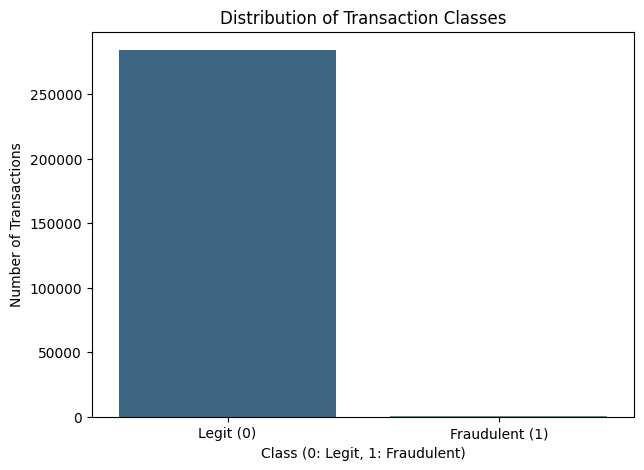

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each class
class_counts = credit_card_data['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Add title and labels
plt.title('Distribution of Transaction Classes')
plt.xlabel('Class (0: Legit, 1: Fraudulent)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Legit (0)', 'Fraudulent (1)'])

# Display the plot
plt.show()

In [10]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [13]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [14]:
#compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Undersampling:Built a sample dataset containing similar distribution of Normal and Fraudulent Transactions

In [15]:
legit_sample = legit.sample(n=492)

In [16]:
#concatenating two dataframes
new_dataset=pd.concat([legit_sample, fraud],axis=0)

In [17]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
155258,104933.0,2.050729,0.488910,-1.658029,1.452844,0.685832,-1.361992,0.752631,-0.614545,1.080302,...,-0.014989,0.328703,-0.005595,-0.064792,0.443990,-0.521764,-0.054789,-0.068327,12.00,0
87311,61630.0,-4.950336,-0.452435,-1.337438,-0.490637,-2.254732,2.632359,-2.684376,-10.716531,0.492419,...,-2.126037,1.808951,1.388622,-0.194461,-0.655855,0.314961,1.118893,0.267945,500.00,0
280307,169445.0,-0.123499,0.240089,-0.112855,-1.514637,-0.292278,-0.931629,0.579129,-0.060739,0.991251,...,-0.174641,-0.162320,0.772608,0.011414,-2.458696,-0.200915,-0.027982,0.042453,64.00,0
157277,109819.0,0.006097,0.902996,0.410813,-0.374624,0.466949,-0.985293,0.929084,-0.253470,1.266898,...,-0.398351,-0.753165,0.125837,-0.088697,-0.528364,0.105094,0.216926,0.091263,16.99,0
225891,144439.0,2.020219,0.096352,-1.608314,0.347576,0.359477,-0.670084,0.067858,-0.086427,0.261117,...,-0.304077,-0.818675,0.354337,0.662606,-0.321775,0.143534,-0.067831,-0.039425,0.99,0


In [18]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


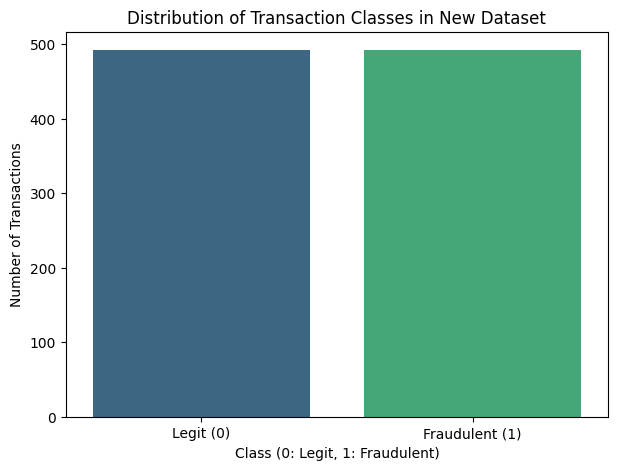

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each class in the new_dataset
class_counts_new = new_dataset['Class'].value_counts()

# Create a bar plot for the new_dataset
plt.figure(figsize=(7, 5))
sns.barplot(x=class_counts_new.index, y=class_counts_new.values, hue=class_counts_new.index, palette='viridis', legend=False)

# Add title and labels
plt.title('Distribution of Transaction Classes in New Dataset')
plt.xlabel('Class (0: Legit, 1: Fraudulent)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Legit (0)', 'Fraudulent (1)'])

# Display the plot
plt.show()

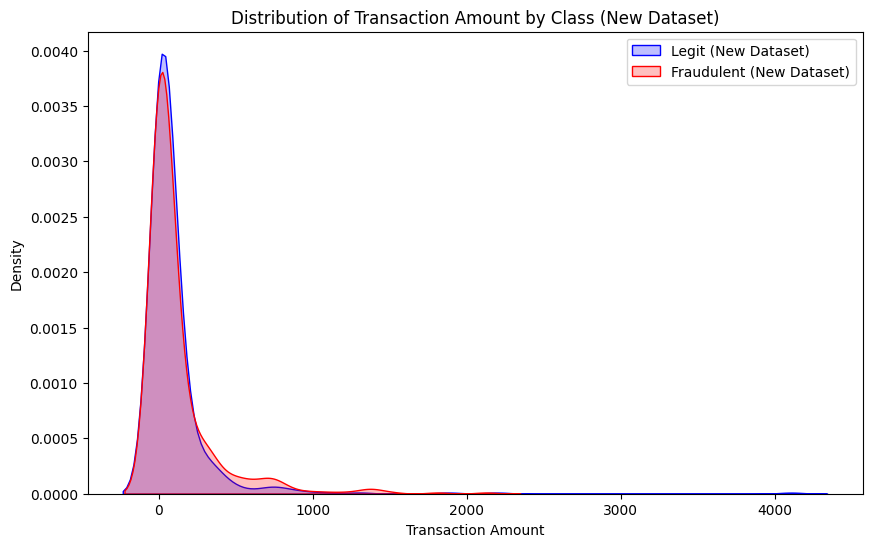

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(new_dataset[new_dataset['Class'] == 0]['Amount'], label='Legit (New Dataset)', fill=True, color='blue')
sns.kdeplot(new_dataset[new_dataset['Class'] == 1]['Amount'], label='Fraudulent (New Dataset)', fill=True, color='red')
plt.title('Distribution of Transaction Amount by Class (New Dataset)')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

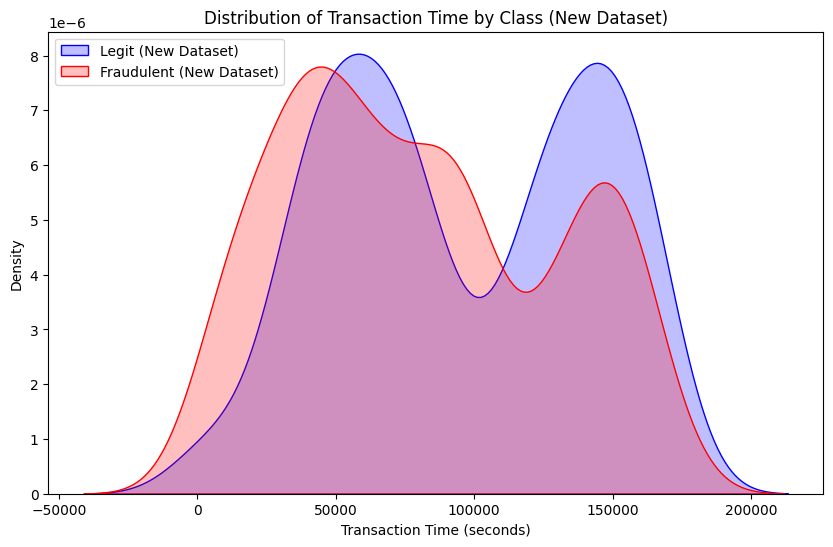

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(new_dataset[new_dataset['Class'] == 0]['Time'], label='Legit (New Dataset)', fill=True, color='blue')
sns.kdeplot(new_dataset[new_dataset['Class'] == 1]['Time'], label='Fraudulent (New Dataset)', fill=True, color='red')
plt.title('Distribution of Transaction Time by Class (New Dataset)')
plt.xlabel('Transaction Time (seconds)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [19]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95996.028455,-0.135712,-0.079679,0.049487,-0.010155,0.082618,0.049177,-0.013183,-0.030158,-0.004057,...,0.050311,-0.020278,-0.007985,0.026027,0.058519,-0.030255,0.018514,0.004096,-0.011380,96.904593
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
X= new_dataset.drop(columns='Class', axis=1)
Y=new_dataset['Class']

In [21]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
155258  104933.0  2.050729  0.488910 -1.658029  1.452844  0.685832 -1.361992   
87311    61630.0 -4.950336 -0.452435 -1.337438 -0.490637 -2.254732  2.632359   
280307  169445.0 -0.123499  0.240089 -0.112855 -1.514637 -0.292278 -0.931629   
157277  109819.0  0.006097  0.902996  0.410813 -0.374624  0.466949 -0.985293   
225891  144439.0  2.020219  0.096352 -1.608314  0.347576  0.359477 -0.670084   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7         V8        V9  

In [22]:
print(Y)

155258    0
87311     0
280307    0
157277    0
225891    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [25]:
model=LogisticRegression()

In [26]:
# training the logistic regression model
model.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# Evaluation
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [28]:
print('Accuracy on Training Data: ',training_data_accuracy)

Accuracy on Training Data:  0.9453621346886912


In [29]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [30]:
print('Accuracy on Test Data: ',test_data_accuracy)

Accuracy on Test Data:  0.9390862944162437


In [31]:
from sklearn.metrics import recall_score

# Recall for Logistic Regression (Training Data)
logreg_train_recall = recall_score(Y_train, X_train_prediction)
print(f'Recall on Training Data (Logistic Regression): {logreg_train_recall}')

# Recall for Logistic Regression (Test Data)
logreg_test_recall = recall_score(Y_test, X_test_prediction)
print(f'Recall on Test Data (Logistic Regression): {logreg_test_recall}')

Recall on Training Data (Logistic Regression): 0.916243654822335
Recall on Test Data (Logistic Regression): 0.9081632653061225


In [32]:
from sklearn.tree import DecisionTreeClassifier


In [33]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)


DecisionTreeClassifier()

In [34]:
dt_X_train_prediction = dt_model.predict(X_train)
dt_training_data_accuracy = accuracy_score(dt_X_train_prediction, Y_train)


In [35]:
print('Accuracy on Training Data (Decision Tree): ', dt_training_data_accuracy)

Accuracy on Training Data (Decision Tree):  1.0


In [36]:
dt_X_test_prediction = dt_model.predict(X_test)
dt_test_data_accuracy = accuracy_score(dt_X_test_prediction, Y_test)


In [37]:
print('Accuracy on Test Data (Decision Tree): ', dt_test_data_accuracy)

Accuracy on Test Data (Decision Tree):  0.8934010152284264


Overfitting: The training accuracy is 1.0 (100%), which means the model has learned the training data perfectly, including any noise or specific patterns unique to the training set. However, the test accuracy is significantly lower at approximately 0.898 (89.8%), indicating that the model is not generalizing well to new, unseen data. It's too complex and has memorized the training examples rather than learning the underlying patterns.

In [38]:
dt_model_tuned = DecisionTreeClassifier(max_depth=5)
dt_model_tuned.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=5)

In [39]:
dt_tuned_X_train_prediction = dt_model_tuned.predict(X_train)
dt_tuned_training_data_accuracy = accuracy_score(dt_tuned_X_train_prediction, Y_train)
print('Accuracy on Training Data (Tuned Decision Tree): ', dt_tuned_training_data_accuracy)

Accuracy on Training Data (Tuned Decision Tree):  0.9796696315120712


In [40]:
dt_tuned_X_test_prediction = dt_model_tuned.predict(X_test)
dt_tuned_test_data_accuracy = accuracy_score(dt_tuned_X_test_prediction, Y_test)
print('Accuracy on Test Data (Tuned Decision Tree): ', dt_tuned_test_data_accuracy)

Accuracy on Test Data (Tuned Decision Tree):  0.9086294416243654


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [43]:
rf_X_train_prediction = rf_model.predict(X_train)
rf_training_data_accuracy = accuracy_score(rf_X_train_prediction, Y_train)

In [44]:
print('Accuracy on Training Data (Random Forest): ', rf_training_data_accuracy)

Accuracy on Training Data (Random Forest):  1.0


In [45]:
rf_X_test_prediction = rf_model.predict(X_test)
rf_test_data_accuracy = accuracy_score(rf_X_test_prediction, Y_test)

In [46]:
print('Accuracy on Test Data (Random Forest): ', rf_test_data_accuracy)

Accuracy on Test Data (Random Forest):  0.9289340101522843


In [47]:
rf_model_tuned = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rf_model_tuned.fit(X_train, Y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [48]:
rf_tuned_X_train_prediction = rf_model_tuned.predict(X_train)
rf_tuned_training_data_accuracy = accuracy_score(rf_tuned_X_train_prediction, Y_train)
print('Accuracy on Training Data (Tuned Random Forest): ', rf_tuned_training_data_accuracy)

Accuracy on Training Data (Tuned Random Forest):  0.9911054637865311


In [49]:
rf_tuned_X_test_prediction = rf_model_tuned.predict(X_test)
rf_tuned_test_data_accuracy = accuracy_score(rf_tuned_X_test_prediction, Y_test)
print('Accuracy on Test Data (Tuned Random Forest): ', rf_tuned_test_data_accuracy)

Accuracy on Test Data (Tuned Random Forest):  0.934010152284264
